STEP 1: Setup and data loading

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load Dataset
data = pd.read_csv("dataset0.csv") 

# Display the first few rows of the dataset to confirm structure
data.head()

,P_wt_percent,BPEI_Mn,AN_percent,EHA_percent,BA_percent,AC_mg-g,DT_C
0,30,600,9.1,0.0,0.0,69.8,71
1,30,600,18.2,0.0,0.0,57.1,57
2,30,600,24.5,0.0,0.0,51.9,57
3,30,600,36.4,0.0,0.0,48.4,43
4,30,1800,0.0,0.0,0.0,91.1,80


STEP 2: Define features and labels

In [2]:
# Define features (synthesis parameters) and labels (target properties)
features = data[['P_wt_percent', 'BPEI_Mn', 'AN_percent', 'EHA_percent', 'BA_percent']]
labels = data[['AC_mg-g', 'DT_C']]

# Display shapes to confirm
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

Features shape: (35, 5)
Labels shape: (35, 2)


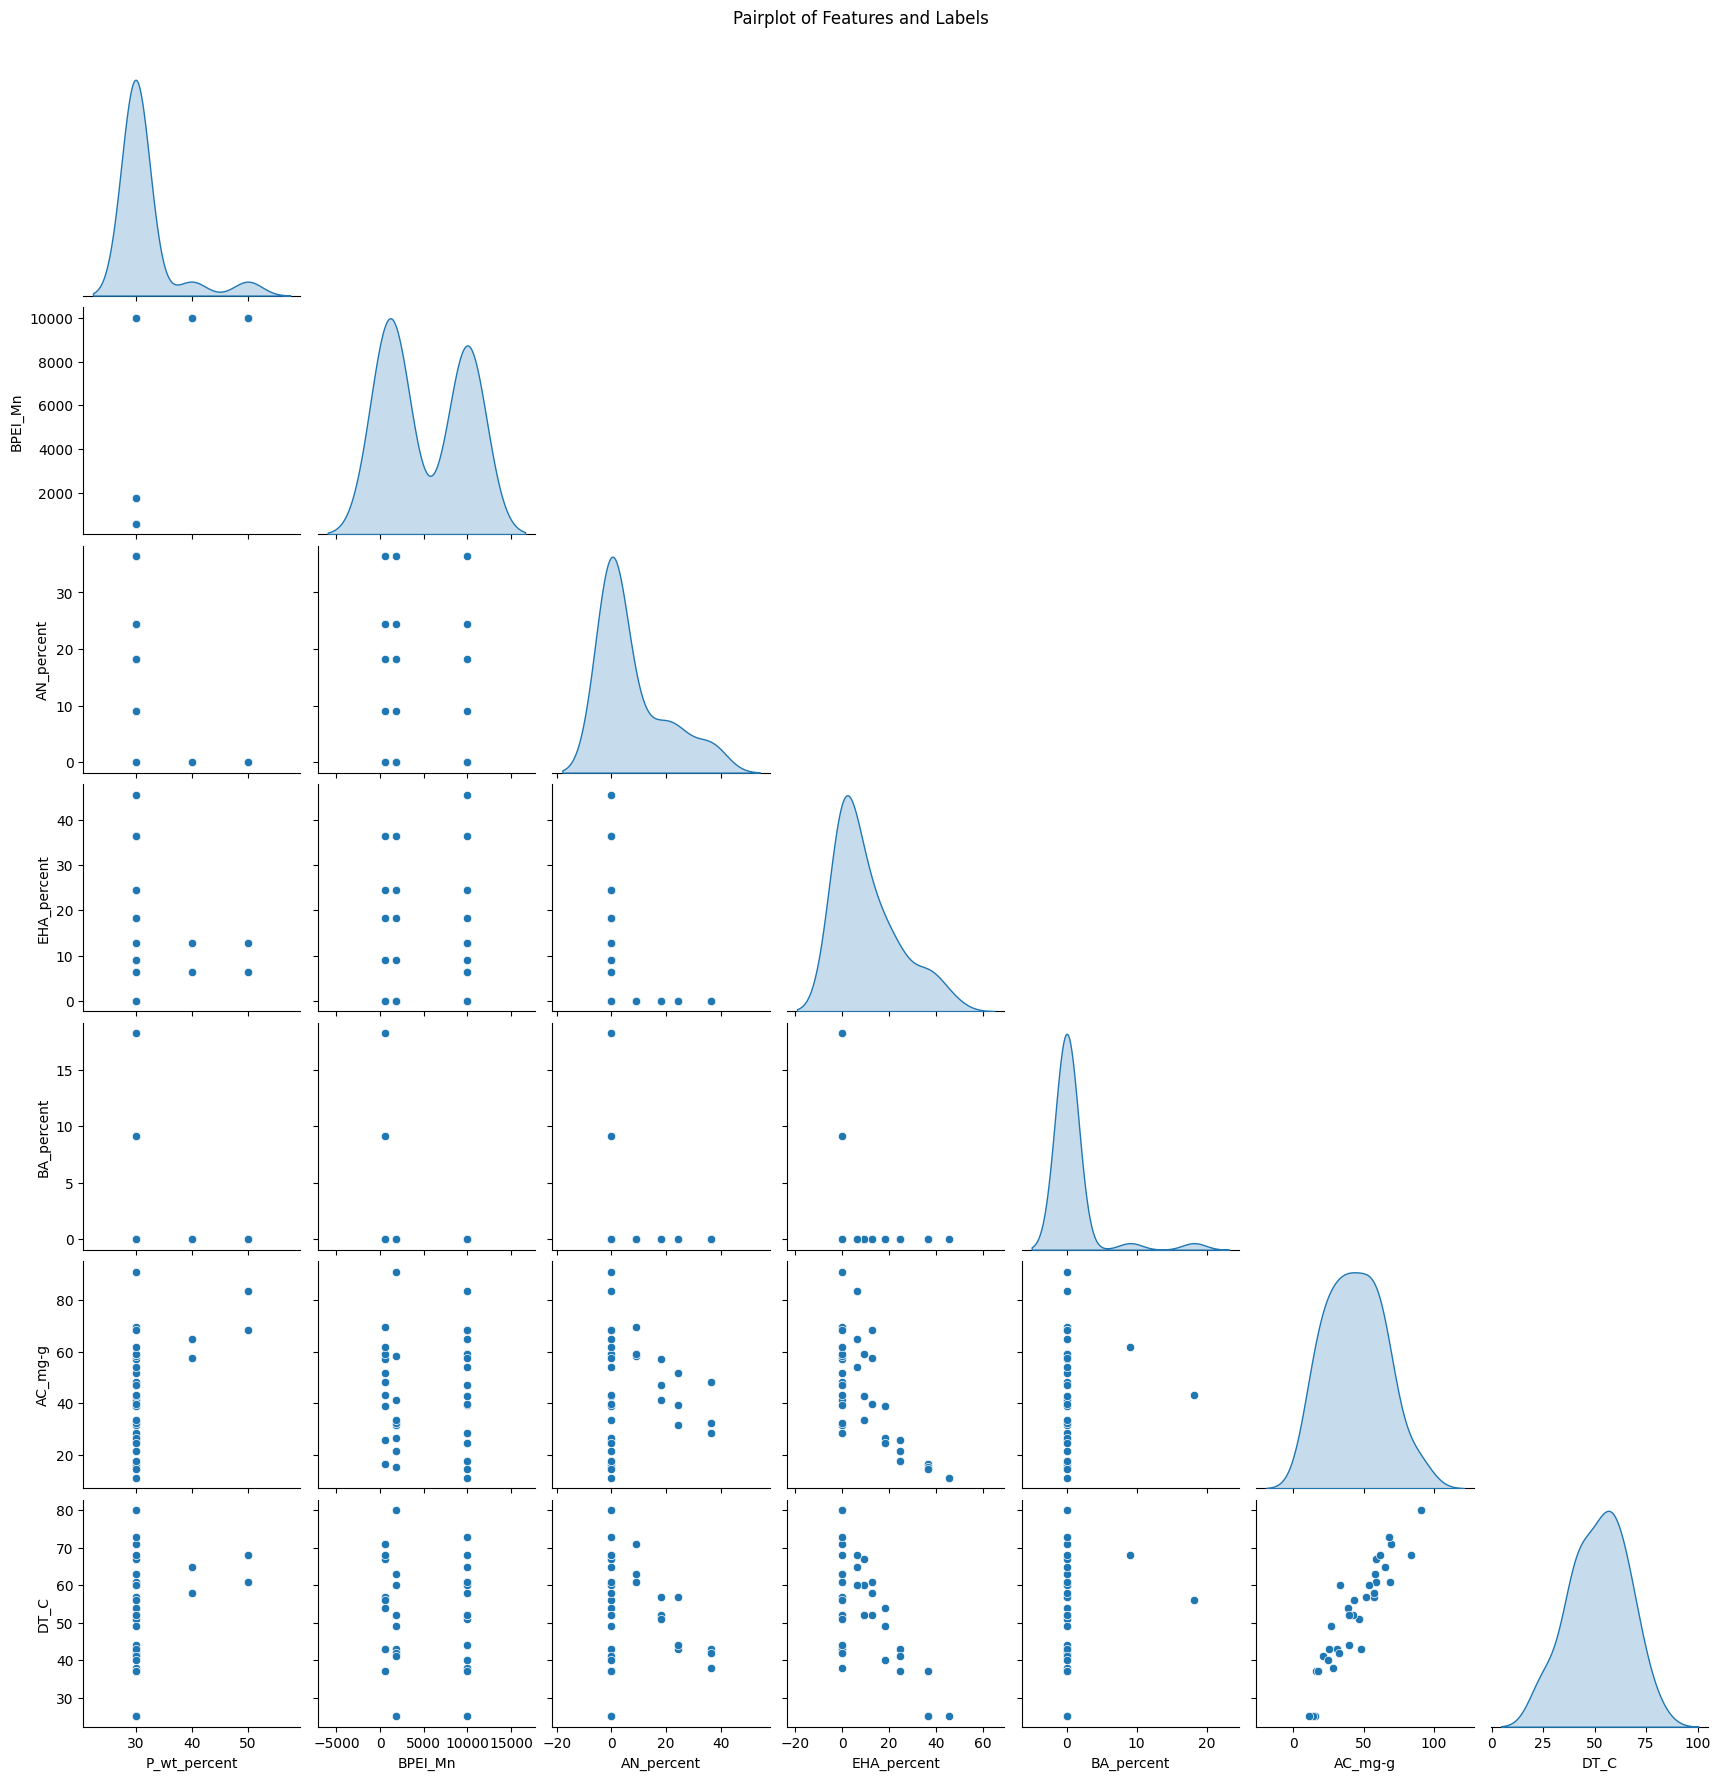

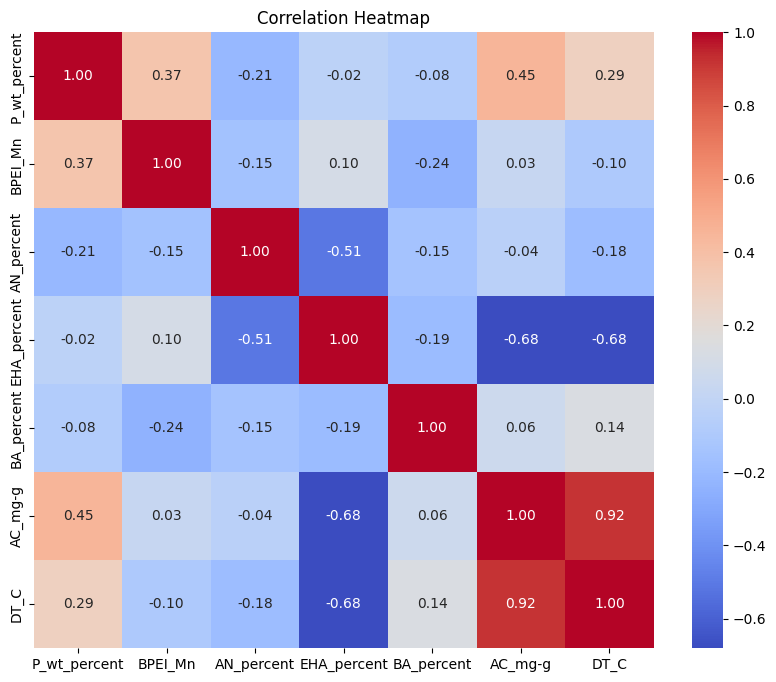

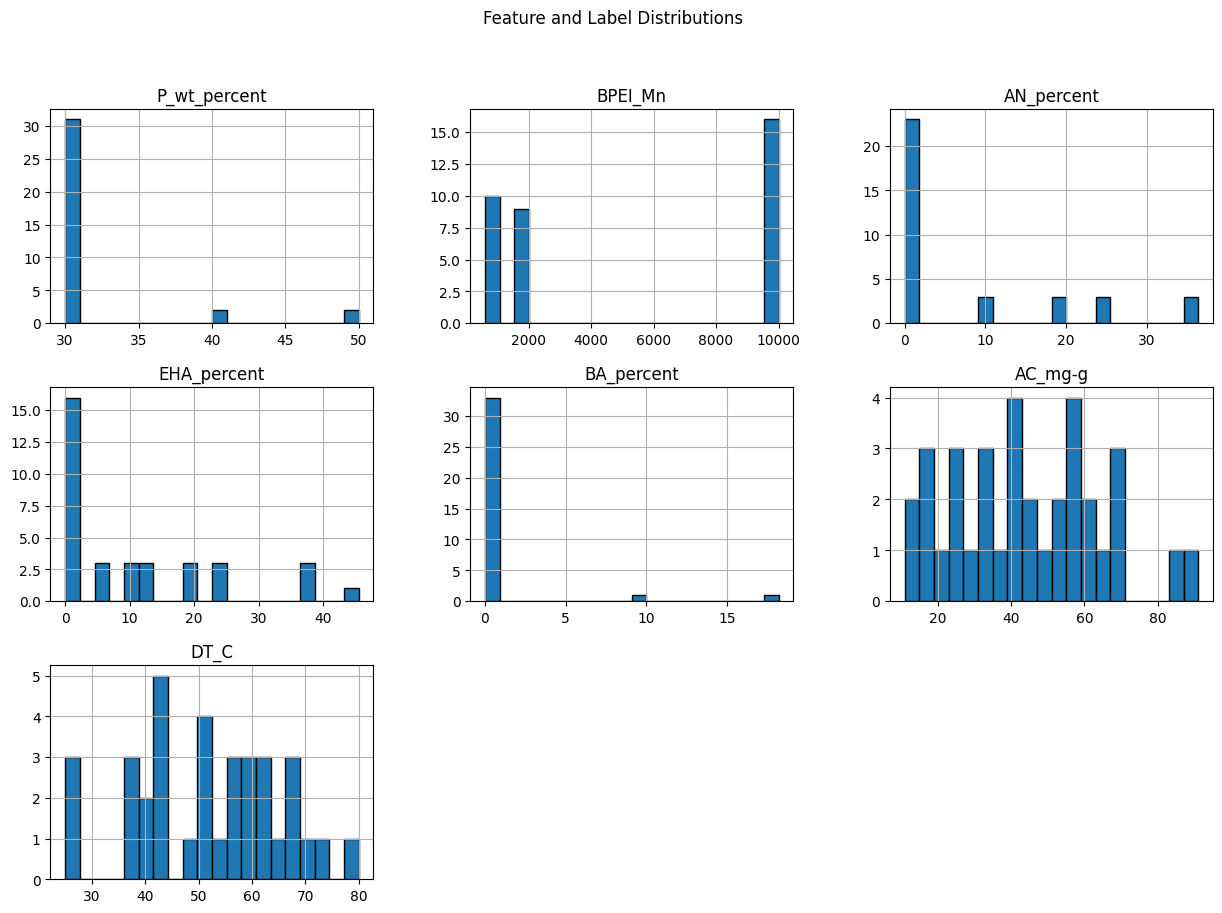

In [3]:
# Visualizations
import seaborn as sns

# 1. Pairplot for feature relationships
sns.pairplot(data, diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Features and Labels", y=1.02)
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# 3. Histograms of individual features and labels
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Feature and Label Distributions")
plt.show()


STEP 3: Train initial random forest models

In [4]:

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for AC_mg-g: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
AC_mg-g Model Evaluation:
MAE: 11.308
RMSE: 13.835
R²: -0.065
R² on full dataset: 0.9567024606656117


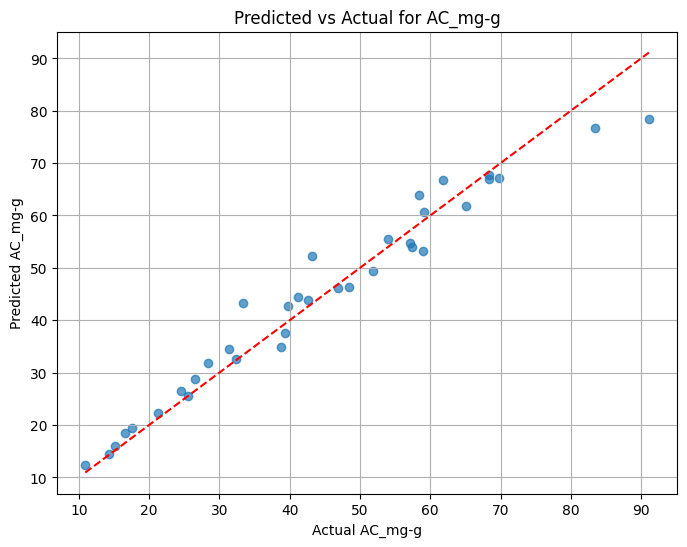

In [5]:
# Train Random Forest for AC_mg-g
ac_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                              param_grid=param_grid, cv=5, 
                              scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
ac_grid_search.fit(features, labels['AC_mg-g'])
ac_model = ac_grid_search.best_estimator_
print("Best parameters for AC_mg-g:", ac_grid_search.best_params_)

# Evaluate AC_mg-g model
ac_mae_scores = cross_val_score(ac_model, features, labels['AC_mg-g'], cv=5, scoring='neg_mean_absolute_error')
ac_rmse_scores = cross_val_score(ac_model, features, labels['AC_mg-g'], cv=5, scoring='neg_root_mean_squared_error')
ac_r2_scores = cross_val_score(ac_model, features, labels['AC_mg-g'], cv=5, scoring='r2')
# R² on the entire dataset
y_pred_ac = ac_model.predict(features)
r2_full_data_ac = r2_score(labels['AC_mg-g'], y_pred_ac)

# Display evaluation metrics
print("AC_mg-g Model Evaluation:")
print(f"MAE: {-np.mean(ac_mae_scores):.3f}")
print(f"RMSE: {-np.mean(ac_rmse_scores):.3f}")
print(f"R²: {np.mean(ac_r2_scores):.3f}")
print("R² on full dataset:", r2_full_data_ac)

# Visualization: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(labels['AC_mg-g'], y_pred_ac, alpha=0.7)
plt.plot([labels['AC_mg-g'].min(), labels['AC_mg-g'].max()], 
         [labels['AC_mg-g'].min(), labels['AC_mg-g'].max()], 'r--')
plt.title('Predicted vs Actual for AC_mg-g')
plt.xlabel('Actual AC_mg-g')
plt.ylabel('Predicted AC_mg-g')
plt.grid()
plt.show()

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for DT_C: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
DT_C Model Evaluation:
MAE: 7.553
RMSE: 8.576
R²: -0.025
R² on full dataset: 0.9678605153151496


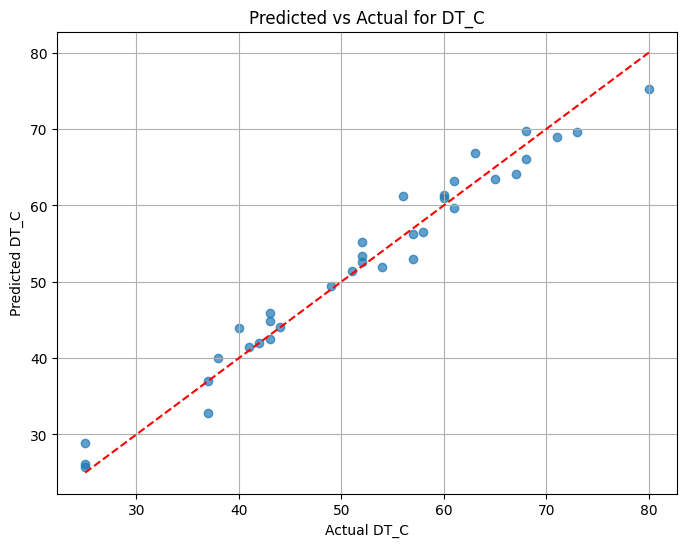

In [6]:
# Train Random Forest for DT_C
dt_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                              param_grid=param_grid, cv=5, 
                              scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
dt_grid_search.fit(features, labels['DT_C'])
dt_model = dt_grid_search.best_estimator_
print("Best parameters for DT_C:", dt_grid_search.best_params_)

# Evaluate DT_C model
dt_mae_scores = cross_val_score(dt_model, features, labels['DT_C'], cv=5, scoring='neg_mean_absolute_error')
dt_rmse_scores = cross_val_score(dt_model, features, labels['DT_C'], cv=5, scoring='neg_root_mean_squared_error')
dt_r2_scores = cross_val_score(dt_model, features, labels['DT_C'], cv=5, scoring='r2')
# R² on the entire dataset
y_pred_dt = dt_model.predict(features)
r2_full_data_dt = r2_score(labels['DT_C'], y_pred_dt)

# Display evaluation metrics
print("DT_C Model Evaluation:")
print(f"MAE: {-np.mean(dt_mae_scores):.3f}")
print(f"RMSE: {-np.mean(dt_rmse_scores):.3f}")
print(f"R²: {np.mean(dt_r2_scores):.3f}")
print("R² on full dataset:", r2_full_data_dt)

# Visualization: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(labels['DT_C'], y_pred_dt, alpha=0.7)
plt.plot([labels['DT_C'].min(), labels['DT_C'].max()], 
         [labels['DT_C'].min(), labels['DT_C'].max()], 'r--')
plt.title('Predicted vs Actual for DT_C')
plt.xlabel('Actual DT_C')
plt.ylabel('Predicted DT_C')
plt.grid()
plt.show()

STEP 4: Define the optimized objective function

In [7]:
def objective_function(x):
    """
    Predicts adsorption capacity and desorption temperature for given synthesis parameters 
    using the two trained Random Forest models and combines them into a single weighted objective score.
    """
    # Convert parameters to DataFrame format for prediction
    params = pd.DataFrame(x, columns=['P_wt_percent', 'BPEI_Mn', 'AN_percent', 'EHA_percent', 'BA_percent'])
    
    # Predict using the separate models
    predicted_ac = ac_model.predict(params)  # Predictions from AC model
    predicted_dt = dt_model.predict(params)  # Predictions from DT model
    
    # Apply weights to DT and AC
    weight_dt = 0.55  # Weight for desorption temperature
    weight_ac = 0.45  # Weight for adsorption capacity
    
    # Combine into a single score (minimize weighted DT/AC)
    weighted_objective_score = ((weight_dt * predicted_dt) / (weight_ac * predicted_ac)).reshape(-1, 1)
    
    # Return the score for minimization in GPyOpt
    return weighted_objective_score

STEP 5: Set bounds for optimization

In [8]:
# Define Bounds for Synthesis Parameters with Discrete Values
bounds = [
    {'name': 'P_wt_percent', 'type': 'discrete', 'domain': np.arange(0, 66, 1)},  # Discrete values from 0 to 65
    {'name': 'BPEI_Mn', 'type': 'discrete', 'domain': [600, 1800, 10000]},         # Discrete predefined values
    {'name': 'AN_percent', 'type': 'discrete', 'domain': np.arange(0, 101, 1)},    # Discrete values from 0 to 100
    {'name': 'EHA_percent', 'type': 'discrete', 'domain': np.arange(0, 101, 1)},   # Discrete values from 0 to 100
    {'name': 'BA_percent', 'type': 'discrete', 'domain': np.arange(0, 101, 1)}     # Discrete values from 0 to 100
]

# Define the constraint that the sum of AN_percent, EHA_percent, and BA_percent should be <= 100
constraints = [{'name': 'sum_constraint', 'constraint': 'x[:,2] + x[:,3] + x[:,4] - 100'}]

STEP 6: Active learning loop with Bayesian optimization

# Cycle 1

In [19]:
from GPyOpt.methods import BayesianOptimization
from operator import itemgetter

print("Cycle 1: Parameter Suggestion Phase")

# Prepare Initial Conditions from Existing Dataset
initial_X = features.values  # Convert DataFrame to numpy array for GPyOpt
initial_Y = ((0.55 * labels['DT_C']) / (0.45 * labels['AC_mg-g'])).values.reshape(-1, 1)  # Weighted DT/AC scores

# Determine the Best (Lowest) Weighted Score from Existing Data
best_existing_score = initial_Y.min()
print(f"Best existing weighted score (minimized): {best_existing_score:.3f}")

# Initialize Bayesian Optimization with the given objective function
optimizer = BayesianOptimization(
    f=objective_function,  # Use the weighted DT/AC objective function
    domain=bounds,
    constraints=constraints,  # Constraints for parameters
    acquisition_type='EI',  # Expected Improvement
    X=initial_X,
    Y=initial_Y
)

# Run optimization for 20 iterations
optimizer.run_optimization(max_iter=20)

# Obtain Suggested Parameter Sets
tested_params = optimizer.X  # All parameters tested during optimization
tested_scores = optimizer.Y  # Corresponding weighted scores (DT/AC)

# Combine and sort parameters and scores by scores in ascending order (lower is better)
params_and_scores = sorted(zip(tested_params, tested_scores), key=itemgetter(1))

# Filter out duplicates from existing data
existing_params = features.values
def is_duplicate(param_set, existing_data):
    return any(np.array_equal(param_set, row) for row in existing_data)

filtered_params_and_scores = [
    (params, score) for params, score in params_and_scores if not is_duplicate(params, existing_params)
]

# Select the top 3 parameter sets regardless of their relationship to the best existing score
top_3_params_and_scores = filtered_params_and_scores[:3]

print("\nTop suggested parameter sets for new experiments:")
for i, (params, score) in enumerate(top_3_params_and_scores):
    formatted_params = [int(param) for param in params]  # Convert to integers
    print(f"Set {i + 1}: Parameters = {formatted_params}, Weighted Score = {score[0]:.3f}")

# Save the top sets for further use
top_params = [entry[0] for entry in top_3_params_and_scores]


Cycle 1: Parameter Suggestion Phase
Best existing weighted score (minimized): 0.995

Top suggested parameter sets for new experiments:
Set 1: Parameters = [65, 600, 65, 0, 0], Weighted Score = 1.021
Set 2: Parameters = [65, 600, 70, 0, 23], Weighted Score = 1.023
Set 3: Parameters = [59, 10000, 3, 4, 1], Weighted Score = 1.056


Visualizing the suggested parameter sets

Ranks of suggested parameter scores among all scores:
       Score  Rank
35  1.021222     2
36  1.022914     3
37  1.055657     4


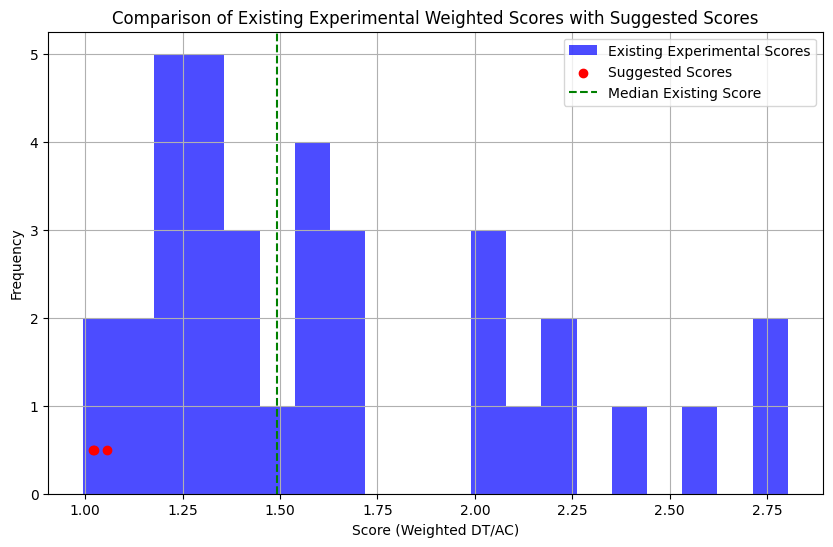

In [20]:
# Combine the suggested parameter scores with the existing scores (using Weighted DT/AC scores)
existing_scores = ((0.55 * labels['DT_C']) / (0.45 * labels['AC_mg-g'])).values  # Weighted DT/AC from experimental data
suggested_scores = [score[0] for _, score in top_3_params_and_scores]  # Suggested scores from optimization

# Create a DataFrame for visualization
score_data = pd.DataFrame({
    'Type': ['Existing'] * len(existing_scores) + ['Suggested'] * len(suggested_scores),
    'Score': np.concatenate([existing_scores, suggested_scores])
})

# Rank the suggested scores among all scores
ranked_scores = pd.DataFrame({
    'Score': np.concatenate([existing_scores, suggested_scores]),
    'Type': ['Existing'] * len(existing_scores) + ['Suggested'] * len(suggested_scores)
}).sort_values('Score')

# Assign ranks (lower is better)
ranked_scores['Rank'] = range(1, len(ranked_scores) + 1)

# Extract ranks of suggested scores
suggested_ranks = ranked_scores[ranked_scores['Type'] == 'Suggested'][['Score', 'Rank']]
print("Ranks of suggested parameter scores among all scores:")
print(suggested_ranks)

# Visualization: Score distribution with suggested scores highlighted
plt.figure(figsize=(10, 6))
plt.hist(existing_scores, bins=20, alpha=0.7, label='Existing Experimental Scores', color='blue')
plt.scatter(suggested_scores, [0.5] * len(suggested_scores), color='red', label='Suggested Scores', zorder=5)
plt.axvline(np.median(existing_scores), color='green', linestyle='--', label='Median Existing Score')
plt.title('Comparison of Existing Experimental Weighted Scores with Suggested Scores')
plt.xlabel('Score (Weighted DT/AC)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# <span style="color:red"> _Waiting for the experimental results . . ._</span>

Update the model based on the experimemtal results in Cycle 1

In [ ]:
# Replace these values with the real experimental results
experimental_results = [
    {'AC_mg-g': 000, 'DT_C': 000},  # Replace with actual values
    {'AC_mg-g': 000, 'DT_C': 000},
    {'AC_mg-g': 000, 'DT_C': 000}
]

# Create a DataFrame of new results
new_results = pd.DataFrame([
    {
        'P_wt_percent': params[0],
        'BPEI_Mn': params[1],
        'AN_percent': params[2],
        'EHA_percent': params[3],
        'BA_percent': params[4],
        'AC_mg-g': result['AC_mg-g'],
        'DT_C': result['DT_C']
    }
    for params, result in zip(top_params, experimental_results)
])

# Append new results to the existing dataset
data = pd.concat([data, new_results], ignore_index=True)

# Update features and labels
features = data[['P_wt_percent', 'BPEI_Mn', 'AN_percent', 'EHA_percent', 'BA_percent']]
labels = data[['AC_mg-g', 'DT_C']]

# Retrain models
ac_model.fit(features, labels['AC_mg-g'])
dt_model.fit(features, labels['DT_C'])

print("\nRetraining completed. Ready for the next cycle.")

# <span style="color:grey"> _Visualization for paper etc . . ._</span>

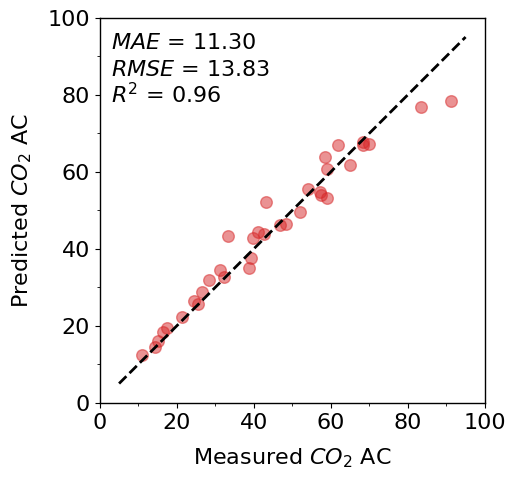

In [21]:
import matplotlib.ticker as mticker
import matplotlib.font_manager as fm

# Plot the figure
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

# Set spine properties
for m in ['top', 'bottom', 'left', 'right']:
    ax.spines[m].set_linewidth(1)
    ax.spines[m].set_color('black')

# Scatter plot with size and color specified
ax.scatter(labels['AC_mg-g'], y_pred_ac, s=70, c='tab:red', alpha=0.5)

# Plot diagonal line (assuming matching ranges for comparison)
ax.plot([5, 95], [5, 95], "k--", lw=2)

# Set font properties for text annotations, using DejaVu Sans as a fallback font
fonts = fm.FontProperties(family='DejaVu Sans', size=16, weight='normal', style='normal')
plt.text(0.03, 0.92, f'$MAE$ = 11.30', transform=ax.transAxes, fontproperties=fonts)
plt.text(0.03, 0.85, f'$RMSE$ = 13.83', transform=ax.transAxes, fontproperties=fonts)
plt.text(0.03, 0.78, f'$R^2$ = 0.96', transform=ax.transAxes, fontproperties=fonts)

# Set labels with LaTeX-style formatting for subscript and superscript
plt.xlabel(r'Measured $CO_{2}$ AC', labelpad=10, fontproperties=fonts)
plt.ylabel(r'Predicted $CO_{2}$ AC', labelpad=10, fontproperties=fonts)


# Set tick locators
ax.xaxis.set_minor_locator(mticker.MultipleLocator(10))
ax.xaxis.set_major_locator(mticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(mticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mticker.MultipleLocator(20))

# Set font properties for tick labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname('DejaVu Sans')
    label.set_fontsize(16)

# Set the same limits on both axes for symmetry
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)

# Set equal aspect ratio for symmetry
ax.set_aspect('equal', adjustable='box')

# Save the figure
dpi_assign = 500
plt.savefig('AC.jpg', dpi=dpi_assign, bbox_inches='tight')

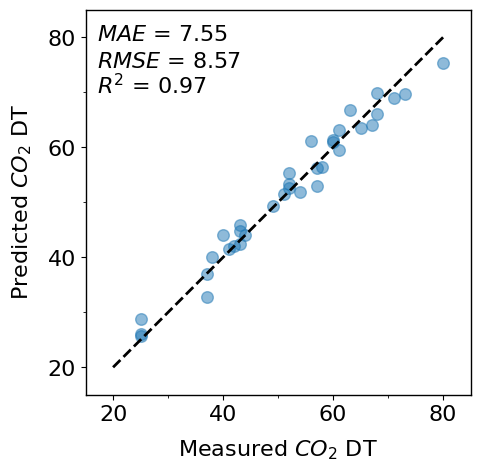

In [22]:
# Plot the figure
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

# Set spine properties
for m in ['top', 'bottom', 'left', 'right']:
    ax.spines[m].set_linewidth(1)
    ax.spines[m].set_color('black')

# Scatter plot with size and color specified
ax.scatter(labels['DT_C'], y_pred_dt, s=70, c='tab:blue', alpha=0.5)

# Plot diagonal line (assuming matching ranges for comparison)
ax.plot([20, 80], [20, 80], "k--", lw=2)

# Set font properties for text annotations, using DejaVu Sans as a fallback font
fonts = fm.FontProperties(family='DejaVu Sans', size=16, weight='normal', style='normal')
plt.text(0.03, 0.92, f'$MAE$ = 7.55', transform=ax.transAxes, fontproperties=fonts)
plt.text(0.03, 0.85, f'$RMSE$ = 8.57', transform=ax.transAxes, fontproperties=fonts)
plt.text(0.03, 0.78, f'$R^2$ = 0.97', transform=ax.transAxes, fontproperties=fonts)

# Set labels with LaTeX-style formatting for subscript and superscript
plt.xlabel(r'Measured $CO_{2}$ DT', labelpad=10, fontproperties=fonts)
plt.ylabel(r'Predicted $CO_{2}$ DT', labelpad=10, fontproperties=fonts)


# Set tick locators
ax.xaxis.set_minor_locator(mticker.MultipleLocator(10))
ax.xaxis.set_major_locator(mticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(mticker.MultipleLocator(10))
ax.yaxis.set_major_locator(mticker.MultipleLocator(20))

# Set font properties for tick labels
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname('DejaVu Sans')
    label.set_fontsize(16)

# Set the same limits on both axes for symmetry
ax.set_xlim(15, 85)
ax.set_ylim(15, 85)

# Set equal aspect ratio for symmetry
ax.set_aspect('equal', adjustable='box')

# Save the figure
dpi_assign = 500
plt.savefig('DT.jpg', dpi=dpi_assign, bbox_inches='tight')